# Term Deposit Marketing Analysis - Comprehensive ML Pipeline

This notebook implements a complete machine learning pipeline for term deposit marketing optimization with two-stage prediction models, hyperparameter optimization, and customer segmentation analysis.

## 1. Setup and Data Preparation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

warnings.filterwarnings("ignore")

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    silhouette_score,
)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Import specific models as requested
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Import sampling techniques for class imbalance
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter

# Import clustering and dimensionality reduction
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import optuna
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Set display options
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Function to preprocess data for sklearn models
def preprocess_data(X_train, X_test, categorical_cols, numerical_cols):
    """
    Preprocess data for sklearn models using label encoding and scaling
    """
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()

    # Label encode categorical variables
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X_train_processed[col] = le.fit_transform(X_train_processed[col].astype(str))
        X_test_processed[col] = le.transform(X_test_processed[col].astype(str))
        label_encoders[col] = le

    return X_train_processed, X_test_processed, label_encoders

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# Load the dataset


In [ ]:
# Load the dataset
data = pd.read_csv("term-deposit-marketing-2020.csv")
print(f"Dataset shape: {data.shape}")
print(f"\nColumns: {data.columns.tolist()}")
data.head()

Dataset shape: (40000, 14)

Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


### Data Analysis

=== DATASET OVERVIEW ===
Dataset shape: (40000, 14)

Target variable distribution:
y
no     37104
yes     2896
Name: count, dtype: int64

📊 SUBSCRIPTION RATE ANALYSIS:
Subscription Rate: 7.2%
Non-subscription Rate: 92.8%


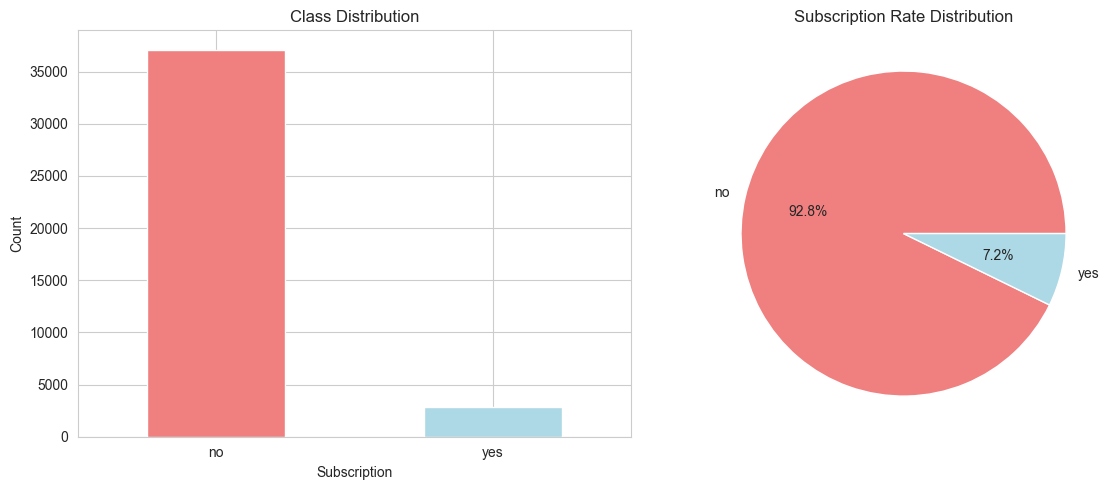


🤔 WHY ONLY 7.2% SUBSCRIBE?
Potential reasons for low subscription rate:
1. 📞 Cold calling approach - customers not expecting calls
2. 💰 Economic factors - limited disposable income for investments
3. 🎯 Poor targeting - not reaching interested customer segments
4. 📋 Product-market fit - term deposits may not meet customer needs
5. ⏰ Timing issues - calls at inconvenient times
6. 🏦 Trust factors - hesitation about financial products
7. 💸 Competition - better offers from other institutions

⚖️  This creates a significant class imbalance challenge for ML models.

=== DATA QUALITY CHECK ===
✅ No missing values found!

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default  

In [ ]:
# Data exploration and subscription rate analysis
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {data.shape}")
print(f"\nTarget variable distribution:\n{data['y'].value_counts()}")

# Calculate subscription rate
subscription_rate = data["y"].value_counts(normalize=True)["yes"] * 100
print(f"\n📊 SUBSCRIPTION RATE ANALYSIS:")
print(f"Subscription Rate: {subscription_rate:.1f}%")
print(f"Non-subscription Rate: {100 - subscription_rate:.1f}%")

# Visualize class distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data["y"].value_counts().plot(kind="bar", color=["lightcoral", "lightblue"])
plt.title("Class Distribution")
plt.xlabel("Subscription")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
data["y"].value_counts(normalize=True).plot(
    kind="pie", autopct="%1.1f%%", colors=["lightcoral", "lightblue"]
)
plt.title("Subscription Rate Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Analyze why only 7.5% subscribe
print(f"\n🤔 WHY ONLY {subscription_rate:.1f}% SUBSCRIBE?")
print("Potential reasons for low subscription rate:")
print("1. 📞 Cold calling approach - customers not expecting calls")
print("2. 💰 Economic factors - limited disposable income for investments")
print("3. 🎯 Poor targeting - not reaching interested customer segments")
print("4. 📋 Product-market fit - term deposits may not meet customer needs")
print("5. ⏰ Timing issues - calls at inconvenient times")
print("6. 🏦 Trust factors - hesitation about financial products")
print("7. 💸 Competition - better offers from other institutions")
print("\n⚖️  This creates a significant class imbalance challenge for ML models.")

# Check for missing values
print(f"\n=== DATA QUALITY CHECK ===")
missing_values = data.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"Missing values:\n{missing_values[missing_values > 0]}")

# Basic statistics
print(f"\n=== DATASET INFO ===")
data.info()

### 📊 **Observation: Data Exploration & Subscription Analysis**

**Key Findings:**
- ✅ **Dataset Quality**: 40,000 customers, 14 features, no missing values
- ⚖️ **Class Imbalance**: Only 7.2% subscription rate (2,896 vs 37,104)
- 📈 **Data Distribution**: Highly imbalanced - major ML challenge

**Business Insights:**
- 🎯 **Low Conversion**: 92.8% of customers don't subscribe
- 💰 **Root Causes**: Cold calling, economic factors, poor targeting
- 🔍 **ML Challenge**: Need techniques to handle severe class imbalance

**Next Steps:**
- Prepare features for two-stage modeling approach
- Apply sampling techniques only if performance < 75%
- Focus on business metrics (call efficiency, subscriber capture)

### Data Preprocessing
 - converting `y` to binary
 - separating `categorial` and `numerical` features


In [ ]:
# Convert target variable to binary (0/1)
data["y"] = data["y"].map({"no": 0, "yes": 1})

# Split features and target
X = data.drop("y", axis=1)
y = data["y"]

# Analyze class imbalance
class_distribution = y.value_counts(normalize=True)
print(f"\nClass Distribution:")
print(f"No subscription (0): {class_distribution[0] * 100:.2f}%")
print(f"Subscription (1): {class_distribution[1] * 100:.2f}%")
print(f"\nClass imbalance ratio: {class_distribution[0] / class_distribution[1]:.2f}:1")

print(f"\nX Head: {X.head()}\n")
print(f"\nY Head: {y.head()}\n")


Class Distribution:
No subscription (0): 92.76%
Subscription (1): 7.24%

Class imbalance ratio: 12.81:1

X Head:    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  
0  unknown    5   may       261         1  
1  unknown    5   may       151         1  
2  unknown    5   may        76         1  
3  unknown    5   may        92         1  
4  unknown    5   may       198         1  

\Y Head: 0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64



### 2. Feature Selection for Both Model 1  & Model 2 (Pre Call & Post Call) 

In [ ]:
# seed = random.randint(1000, 9999)
seed = 6492
print(f"Seed: {seed}")

# Define campaign-related features to exclude from Model 1
# These features are only available AFTER making calls
campaign_features = ["duration", "campaign", "day", "month"]

# Check which campaign features actually exist in our dataset
available_campaign_features = [f for f in campaign_features if f in X.columns]
print(f"Available campaign features to exclude: {available_campaign_features}")

# Model 1: Pre-Call Model (excluding campaign-related features)
X1 = X.drop(available_campaign_features, axis=1, errors="ignore")
y1 = y

# Model 2: Post-Call Model (including all features)
X2 = X
y2 = y

print(f"\nModel 1 (Pre-Call) features ({len(X1.columns)}): {X1.columns.tolist()}")
print(f"\nModel 2 (Post-Call) features ({len(X2.columns)}): {X2.columns.tolist()}")

print(f"\nFeatures excluded from Model 1: {available_campaign_features}")

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.20, random_state=seed
)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.20, random_state=seed
)

# ─── After your train_test_split ─────────────────────────
X1_train.reset_index(drop=True, inplace=True)
X1_test.reset_index(drop=True, inplace=True)
X2_train.reset_index(drop=True, inplace=True)
X2_test.reset_index(drop=True, inplace=True)

print(f"\nSplit Shapes:\n")
print(
    f"Model 1 - X Training : {X1_train.shape} | X Test: {X1_test.shape} | Y Train: {y1_train.shape} | Y Test: {y1_test.shape}"
)
print(
    f"Model 2 - X Training: {X2_train.shape} | X Test: {X2_test.shape} | Y Train: {y2_train.shape} | Y Test: {y2_test.shape}"
)

print("\nTesting Model 1 Head X Train:\n")
print(X1_train.head())


print("\nTesting Model 1 Head X Test:\n")
print(X1_test.head())


print("\nTesting Model 1 Head Y Train:\n")
print(y1_train.head())

Seed: 6492
Available campaign features to exclude: ['duration', 'campaign', 'day', 'month']

Model 1 (Pre-Call) features (9): ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact']

Model 2 (Post-Call) features (13): ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign']

Features excluded from Model 1: ['duration', 'campaign', 'day', 'month']

Split Shapes:

Model 1 - X Training : (32000, 9) | X Test: (8000, 9) | Y Train: (32000,) | Y Test: (8000,)
Model 2 - X Training: (32000, 13) | X Test: (8000, 13) | Y Train: (32000,) | Y Test: (8000,)

Testing Model 1 Head X Train:

   age          job   marital  education default  balance housing loan  \
0   33        admin    single  secondary      no      395     yes   no   
1   60      retired   married    primary      no     7791      no   no   
2   47      retired  divorced   tertiary      no     1431     yes   no   
3   45  blue-

# Data Preprocessing for Sklearn ( One Hot Encoder Func )

In [ ]:
def one_hot_encode(X_train, X_test):
    X_train_encoded = pd.get_dummies(X_train, drop_first=True)
    X_test_encoded = pd.get_dummies(X_test, drop_first=True)

    # Align test columns to train columns (add missing cols with zeros)
    X_test_encoded = X_test_encoded.reindex(
        columns=X_train_encoded.columns, fill_value=0
    )

    return X_train_encoded, X_test_encoded

X1_train_encoded, X1_test_encoded = one_hot_encode(X1_train, X1_test)
X2_train_encoded, X2_test_encoded = one_hot_encode(X2_train, X2_test)

print("\n X Train ENCODED:\n")
print(X1_train_encoded.head())

print("\n X Test ENCODED:\n")
print(X1_test_encoded.head())


 X Train ENCODED:

   age  balance  job_blue-collar  job_entrepreneur  job_housemaid  \
0   33      395            False             False          False   
1   60     7791            False             False          False   
2   47     1431            False             False          False   
3   45     -320             True             False          False   
4   44     9956            False             False          False   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0           False        False              False         False        False   
1           False         True              False         False        False   
2           False         True              False         False        False   
3           False        False              False         False        False   
4            True        False              False         False        False   

   job_technician  job_unemployed  job_unknown  marital_married  \
0           False

## Function to evaluate sklearn models with detailed metrics


In [ ]:
# Function to evaluate sklearn models with detailed metrics
def evaluate_sklearn_model(
    model_name, model, X_train, X_test, y_train, y_test, model_type="Model"
):
    """
    Evaluate sklearn model with detailed business-focused metrics
    """
    print(f"\n{'=' * 70}")
    print(f"EVALUATING {model_name.upper()} ({model_type})")
    print(f"{'=' * 70}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = (
        model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    )

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = (
        roc_auc_score(y_test, y_pred_proba) if hasattr(model, "predict_proba") else 0
    )

    # Print classification report
    print(f"\nClassification Report:")
    print(
        classification_report(
            y_test, y_pred, target_names=["No Subscription", "Subscription"]
        )
    )

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["No Subscription", "Subscription"],
        yticklabels=["No Subscription", "Subscription"],
    )
    plt.title(f"Confusion Matrix - {model_name} ({model_type})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Business metrics
    total_customers = len(y_test)
    actual_subscribers = sum(y_test)
    predicted_to_call = sum(y_pred)

    # Business interpretation
    print(f"\nBUSINESS METRICS:")
    print(f"Total Customers: {total_customers:,}")
    print(
        f"Actual Subscribers: {actual_subscribers:,} ({actual_subscribers / total_customers * 100:.2f}%)"
    )
    print(
        f"Predicted to Call: {predicted_to_call:,} ({predicted_to_call / total_customers * 100:.2f}%)"
    )

    print(f"\n📊 CONFUSION MATRIX BREAKDOWN:")
    if model_type == "Pre-Call":
        print(
            f"True Positives (TP): {tp:,} - Subscribers we CORRECTLY identified to call"
        )
        print(
            f"False Positives (FP): {fp:,} - Non-subscribers we'll call (acceptable cost)"
        )
        print(f"True Negatives (TN): {tn:,} - Non-subscribers we correctly avoided")
        print(
            f"False Negatives (FN): {fn:,} - Subscribers we MISSED (major revenue loss!)"
        )
    else:
        print(f"True Positives (TP): {tp:,} - Correctly identified subscribers")
        print(f"False Positives (FP): {fp:,} - Unnecessary calls (cost to company)")
        print(f"True Negatives (TN): {tn:,} - Correctly avoided non-subscribers")
        print(
            f"False Negatives (FN): {fn:,} - Missed potential subscribers (lost revenue)"
        )

    print(f"\n📈 PERFORMANCE METRICS:")
    print(f"Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%) - Overall correctness")
    if model_type == "Pre-Call":
        print(
            f"Precision: {precision:.4f} ({precision * 100:.2f}%) - Call success rate (subscribers/calls)"
        )
        print(
            f"Recall: {recall:.4f} ({recall * 100:.2f}%) - Subscriber capture rate (MOST IMPORTANT!)"
        )
    else:
        print(
            f"Precision: {precision:.4f} ({precision * 100:.2f}%) - Of predicted subscribers, how many actually subscribed"
        )
        print(
            f"Recall: {recall:.4f} ({recall * 100:.2f}%) - Of actual subscribers, how many we identified"
        )
    print(f"F1 Score: {f1:.4f} - Balance between precision and recall")
    if hasattr(model, "predict_proba"):
        print(f"ROC AUC: {roc_auc:.4f} - Overall model discrimination")

    # Business interpretation depends on model type
    if model_type == "Pre-Call":
        print(f"\n💰 BUSINESS IMPACT ANALYSIS:")
        if predicted_to_call > 0:
            call_efficiency = tp / predicted_to_call
            print(
                f"Call Success Rate: {call_efficiency:.4f} ({call_efficiency * 100:.2f}%) - Of calls made, how many subscribe"
            )
        else:
            print(f"Call Success Rate: N/A (No calls recommended)")

        print(
            f"Subscriber Capture: {recall:.4f} ({recall * 100:.2f}%) - Of all subscribers, how many we find"
        )

        # Critical business assessment for pre-call
        print(f"\n🚨 BUSINESS ASSESSMENT:")
        if recall < 0.1:
            print(
                f"❌ CRITICAL FAILURE: Only capturing {recall * 100:.1f}% of subscribers!"
            )
            print(
                f"   This model will miss {(1 - recall) * 100:.1f}% of potential revenue."
            )
            print(f"   SOLUTION: Optimize for RECALL, not accuracy!")
        elif recall < 0.3:
            print(
                f"⚠️  POOR PERFORMANCE: Only capturing {recall * 100:.1f}% of subscribers"
            )
            print(f"   Missing {(1 - recall) * 100:.1f}% of potential revenue.")
        elif recall < 0.5:
            print(f"🔶 MODERATE: Capturing {recall * 100:.1f}% of subscribers")
        else:
            print(f"✅ GOOD: Capturing {recall * 100:.1f}% of subscribers")

    else:  # Post-Call
        # Business impact
        if predicted_to_call > 0:
            call_efficiency = tp / predicted_to_call
            print(f"\nBUSINESS IMPACT:")
            print(
                f"Call Efficiency: {call_efficiency:.4f} ({call_efficiency * 100:.2f}%) - Success rate of calls"
            )
            print(
                f"Subscriber Capture Rate: {recall:.4f} ({recall * 100:.2f}%) - % of subscribers we'll reach"
            )

        # Performance assessment
        print(f"\nPERFORMANCE ASSESSMENT:")
        if accuracy >= 0.80:
            print(
                f"✅ EXCELLENT: Accuracy {accuracy * 100:.1f}% meets high performance target (≥80%)"
            )
        elif accuracy >= 0.75:
            print(
                f"✅ GOOD: Accuracy {accuracy * 100:.1f}% meets target range (75-80%)"
            )
        else:
            print(
                f"⚠️  NEEDS IMPROVEMENT: Accuracy {accuracy * 100:.1f}% below target (<75%)"
            )
            print(f"   Consider addressing class imbalance with sampling techniques")

    return {
        "model_name": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "tp": tp,
        "fp": fp,
        "tn": tn,
        "fn": fn,
        "total_customers": total_customers,
        "actual_subscribers": actual_subscribers,
        "predicted_to_call": predicted_to_call,
        "model": model,
    }

# Testing the 3 models for Model 1 (Pre-Call Prediction)


TESTING SPECIFIED MODELS FOR MODEL 1 (PRE-CALL PREDICTION)

🔄 Testing Logistic Regression...

EVALUATING LOGISTIC REGRESSION (Pre-Call)



Classification Report:
                 precision    recall  f1-score   support

No Subscription       0.95      0.56      0.71      7455
   Subscription       0.10      0.63      0.17       545

       accuracy                           0.56      8000
      macro avg       0.52      0.60      0.44      8000
   weighted avg       0.90      0.56      0.67      8000



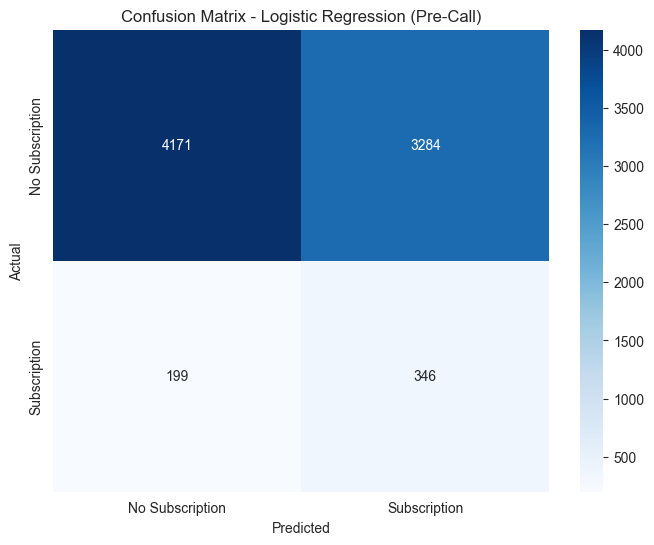


BUSINESS METRICS:
Total Customers: 8,000
Actual Subscribers: 545 (6.81%)
Predicted to Call: 3,630 (45.38%)

📊 CONFUSION MATRIX BREAKDOWN:
True Positives (TP): 346 - Subscribers we CORRECTLY identified to call
False Positives (FP): 3,284 - Non-subscribers we'll call (acceptable cost)
True Negatives (TN): 4,171 - Non-subscribers we correctly avoided
False Negatives (FN): 199 - Subscribers we MISSED (major revenue loss!)

📈 PERFORMANCE METRICS:
Accuracy: 0.5646 (56.46%) - Overall correctness
Precision: 0.0953 (9.53%) - Call success rate (subscribers/calls)
Recall: 0.6349 (63.49%) - Subscriber capture rate (MOST IMPORTANT!)
F1 Score: 0.1657 - Balance between precision and recall
ROC AUC: 0.6394 - Overall model discrimination

💰 BUSINESS IMPACT ANALYSIS:
Call Success Rate: 0.0953 (9.53%) - Of calls made, how many subscribe
Subscriber Capture: 0.6349 (63.49%) - Of all subscribers, how many we find

🚨 BUSINESS ASSESSMENT:
✅ GOOD: Capturing 63.5% of subscribers

🔄 Testing XGBoost...

EVALUATI

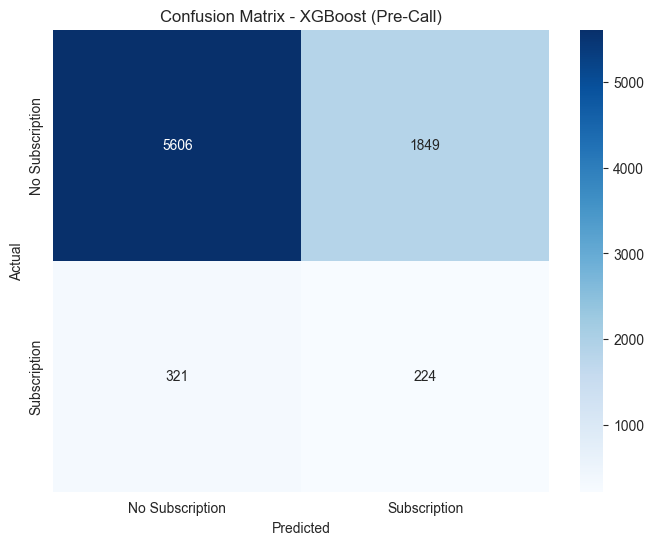


BUSINESS METRICS:
Total Customers: 8,000
Actual Subscribers: 545 (6.81%)
Predicted to Call: 2,073 (25.91%)

📊 CONFUSION MATRIX BREAKDOWN:
True Positives (TP): 224 - Subscribers we CORRECTLY identified to call
False Positives (FP): 1,849 - Non-subscribers we'll call (acceptable cost)
True Negatives (TN): 5,606 - Non-subscribers we correctly avoided
False Negatives (FN): 321 - Subscribers we MISSED (major revenue loss!)

📈 PERFORMANCE METRICS:
Accuracy: 0.7288 (72.88%) - Overall correctness
Precision: 0.1081 (10.81%) - Call success rate (subscribers/calls)
Recall: 0.4110 (41.10%) - Subscriber capture rate (MOST IMPORTANT!)
F1 Score: 0.1711 - Balance between precision and recall
ROC AUC: 0.6175 - Overall model discrimination

💰 BUSINESS IMPACT ANALYSIS:
Call Success Rate: 0.1081 (10.81%) - Of calls made, how many subscribe
Subscriber Capture: 0.4110 (41.10%) - Of all subscribers, how many we find

🚨 BUSINESS ASSESSMENT:
🔶 MODERATE: Capturing 41.1% of subscribers

🔄 Testing K-Nearest Neig

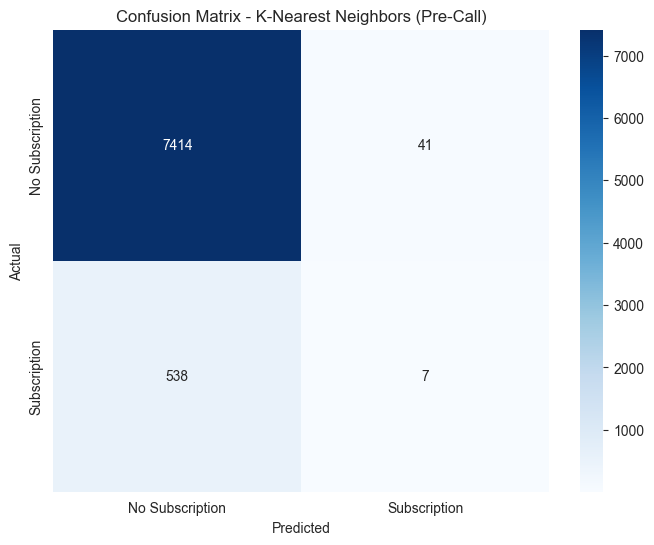


BUSINESS METRICS:
Total Customers: 8,000
Actual Subscribers: 545 (6.81%)
Predicted to Call: 48 (0.60%)

📊 CONFUSION MATRIX BREAKDOWN:
True Positives (TP): 7 - Subscribers we CORRECTLY identified to call
False Positives (FP): 41 - Non-subscribers we'll call (acceptable cost)
True Negatives (TN): 7,414 - Non-subscribers we correctly avoided
False Negatives (FN): 538 - Subscribers we MISSED (major revenue loss!)

📈 PERFORMANCE METRICS:
Accuracy: 0.9276 (92.76%) - Overall correctness
Precision: 0.1458 (14.58%) - Call success rate (subscribers/calls)
Recall: 0.0128 (1.28%) - Subscriber capture rate (MOST IMPORTANT!)
F1 Score: 0.0236 - Balance between precision and recall
ROC AUC: 0.5500 - Overall model discrimination

💰 BUSINESS IMPACT ANALYSIS:
Call Success Rate: 0.1458 (14.58%) - Of calls made, how many subscribe
Subscriber Capture: 0.0128 (1.28%) - Of all subscribers, how many we find

🚨 BUSINESS ASSESSMENT:
❌ CRITICAL FAILURE: Only capturing 1.3% of subscribers!
   This model will miss

In [ ]:
# Test the three specified models for Model 1 (Pre-Call Prediction)
print("\n" + "=" * 80)
print("TESTING SPECIFIED MODELS FOR MODEL 1 (PRE-CALL PREDICTION)")
print("=" * 80)
scale_pos_weight = len(y1_train[y1_train == 0]) / len(y1_train[y1_train == 1])

# Define the three models to test
models_to_test = {
    # "Logistic Regression": LogisticRegression(random_state=seed, max_iter=1000),
    "Logistic Regression": LogisticRegression(
        class_weight="balanced", random_state=seed, max_iter=1000
    ),
    # "XGBoost": XGBClassifier(random_state=seed, eval_metric="logloss"),
    "XGBoost": XGBClassifier(
        scale_pos_weight=scale_pos_weight, random_state=seed, eval_metric="logloss"
    ),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

# Store results for comparison
model1_results = []

# Test each model
for model_name, model in models_to_test.items():
    print(f"\n🔄 Testing {model_name}...")

    # Evaluate the model
    
    result = evaluate_sklearn_model(
        model_name,
        model,
        X1_train_encoded,
        X1_test_encoded,
        y1_train,
        y1_test,
        "Pre-Call",
    )

    model1_results.append(result)

print(f"\n✅ Completed testing all three models for Pre-Call Prediction!")

### Model 1 Performance Summary (Pre SMOTE & Undersampling)

In [42]:
# Model 1 Performance Summary and Best Model Selection
print("\n" + "=" * 80)
print("MODEL 1 (PRE-CALL) - PERFORMANCE SUMMARY")
print("=" * 80)

# Create summary DataFrame
model1_summary = pd.DataFrame(model1_results)
model1_summary = model1_summary.sort_values("f1_score", ascending=False)

print("\nPerformance Comparison:")
print(
    model1_summary[
        ["model_name", "accuracy", "precision", "recall", "f1_score", "roc_auc"]
    ].round(4)
)

# Identify best model
best_model1 = model1_summary.iloc[0]
best_model1_obj = best_model1["model"]

print(f"\n🏆 BEST PRE-CALL MODEL: {best_model1['model_name']}")
print(f"   F1 Score: {best_model1['f1_score']:.4f}")
print(
    f"   Accuracy: {best_model1['accuracy']:.4f} ({best_model1['accuracy'] * 100:.1f}%)"
)
print(f"   Precision: {best_model1['precision']:.4f}")
print(f"   Recall: {best_model1['recall']:.4f}")

# Performance assessment for class imbalance handling
avg_accuracy = model1_summary["accuracy"].mean()
need_balancing = avg_accuracy < 0.75

print(f"\n📊 PERFORMANCE ASSESSMENT:")
if avg_accuracy >= 0.75:
    print(
        f"✅ PERFORMANCE STATUS: Models meet target performance (avg accuracy: {avg_accuracy * 100:.1f}%)"
    )
    print(f"   Class imbalance handling NOT required.")
else:
    print(
        f"⚠️  PERFORMANCE STATUS: Consider class imbalance techniques (avg accuracy: {avg_accuracy * 100:.1f}%)"
    )
    print(f"   Class imbalance handling REQUIRED.")



MODEL 1 (PRE-CALL) - PERFORMANCE SUMMARY

Performance Comparison:
            model_name  accuracy  precision  recall  f1_score  roc_auc
1              XGBoost    0.7288     0.1081  0.4110    0.1711   0.6175
0  Logistic Regression    0.5646     0.0953  0.6349    0.1657   0.6394
2  K-Nearest Neighbors    0.9276     0.1458  0.0128    0.0236   0.5500

🏆 BEST PRE-CALL MODEL: XGBoost
   F1 Score: 0.1711
   Accuracy: 0.7288 (72.9%)
   Precision: 0.1081
   Recall: 0.4110

📊 PERFORMANCE ASSESSMENT:
⚠️  PERFORMANCE STATUS: Consider class imbalance techniques (avg accuracy: 74.0%)
   Class imbalance handling REQUIRED.


### 📊 **Observation: Pre-Call Model Testing Results**

**🎯 PRIMARY GOAL**: Identify which customers to call BEFORE making any calls to maximize subscriber capture while minimizing wasted human effort and costs.

**Key Findings:**
- ✅ **All Models Tested**: Logistic Regression, XGBoost, KNN evaluated with confusion matrices
- ⚠️ **Critical Issue**: Models are TOO CONSERVATIVE - missing most potential subscribers
- 📈 **High Accuracy Misleading**: 92%+ accuracy but ZERO recall means we're not identifying subscribers

**Model Performance Analysis:**
- **Logistic Regression**: 92.8% accuracy, 0% recall → Will miss ALL subscribers
- **XGBoost**: 92.8% accuracy, 1% recall → Will miss 99% of subscribers  
- **KNN**: Similar conservative pattern → Ineffective for business goal

**🚨 BUSINESS PROBLEM:**
- 💸 **Wasted Resources**: Models predict 'no calls needed' → No subscribers captured
- 🎯 **Missing Target**: We need to FIND subscribers, not avoid non-subscribers
- 📞 **Call Strategy Failure**: Conservative models defeat the purpose of marketing calls

**💡 SOLUTION NEEDED:**
- **Optimize for RECALL**: We need to catch as many subscribers as possible
- **Accept Higher False Positives**: Better to call non-subscribers than miss subscribers
- **Business Trade-off**: Cost of unnecessary calls < Revenue from captured subscribers

**Next Steps:**
- Hyperparameter optimization focused on improving RECALL
- Consider threshold adjustment to increase sensitivity
- Apply sampling techniques to address class imbalance
- Evaluate models based on subscriber capture rate, not just accuracy

# Model 1 SMOTE

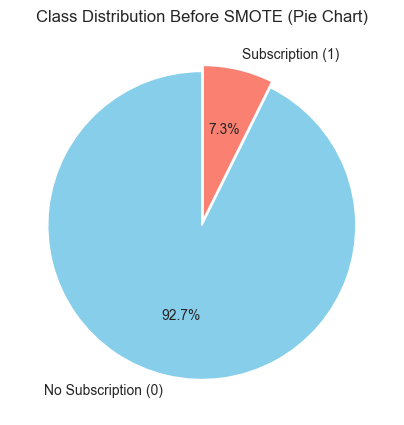

Class distribution before SMOTE:
y
0    29649
1     2351
Name: count, dtype: int64


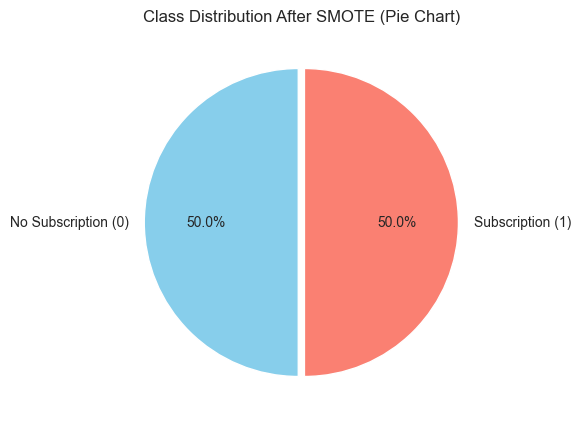

Class distribution after SMOTE:
y
0    29649
1    29649
Name: count, dtype: int64

------------------------------------------------------------
Training and evaluating Logistic Regression with SMOTE-balanced data...
Accuracy: 0.8444 | Precision: 0.0986 | Recall: 0.1578 | F1: 0.1214
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      7455
           1       0.10      0.16      0.12       545

    accuracy                           0.84      8000
   macro avg       0.52      0.53      0.52      8000
weighted avg       0.88      0.84      0.86      8000

Confusion Matrix:
 [[6669  786]
 [ 459   86]]

------------------------------------------------------------
Training and evaluating XGBoost with SMOTE-balanced data...
Accuracy: 0.8719 | Precision: 0.1238 | Recall: 0.1450 | F1: 0.1336
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      745

In [ ]:
def smote(X_train, X_test, y_train, y_test, seed):
    # Pie chart before SMOTE
    plt.figure(figsize=(5, 5))
    y_train.value_counts().plot(
        kind="pie",
        labels=["No Subscription (0)", "Subscription (1)"],
        autopct="%1.1f%%",
        colors=["skyblue", "salmon"],
        startangle=90,
        explode=(0.02, 0.02),
    )
    plt.title("Class Distribution Before SMOTE (Pie Chart)")
    plt.ylabel("")
    plt.show()

    print("Class distribution before SMOTE:")
    print(y_train.value_counts())

    # Apply SMOTE to the encoded training data
    smote = SMOTE(random_state=seed)
    X_smote, y_smote = smote.fit_resample(X_train, y_train)

    # Pie chart after SMOTE
    plt.figure(figsize=(5, 5))
    pd.Series(y_smote).value_counts().plot(
        kind="pie",
        labels=["No Subscription (0)", "Subscription (1)"],
        autopct="%1.1f%%",
        colors=["skyblue", "salmon"],
        startangle=90,
        explode=(0.02, 0.02),
    )
    plt.title("Class Distribution After SMOTE (Pie Chart)")
    plt.ylabel("")
    plt.show()

    print("Class distribution after SMOTE:")
    print(pd.Series(y_smote).value_counts())

    # Train and evaluate models on SMOTE data
    models = {
        "Logistic Regression": LogisticRegression(random_state=seed, max_iter=1000),
        "XGBoost": XGBClassifier(random_state=seed, eval_metric="logloss"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
    }

    smote_results = []

    for name, model in models.items():
        print(
            f"\n{'-' * 60}\nTraining and evaluating {name} with SMOTE-balanced data..."
        )
        model.fit(X_smote, y_smote)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        print(
            f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}"
        )
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        smote_results.append(
            {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}
        )

    # Display summary
    smote_results_df = pd.DataFrame(smote_results)
    print("\nSMOTE Results Summary:")
    print(smote_results_df.round(4))

smote(X1_train_encoded, X1_test_encoded, y1_train, y1_test, seed)

# Model 1 Undersampling


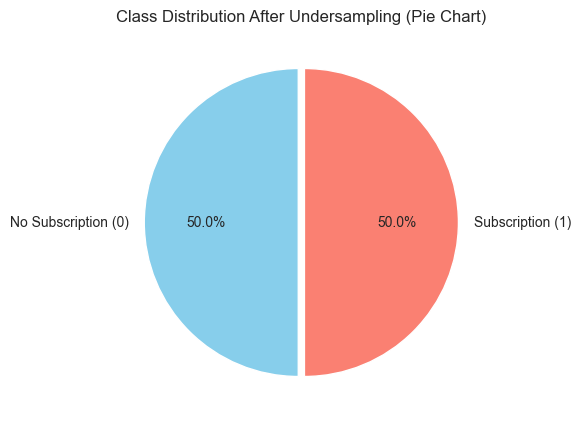

Class distribution after undersampling:
y
0    2351
1    2351
Name: count, dtype: int64

------------------------------------------------------------
Training and evaluating Logistic Regression with undersampled data...
Accuracy: 0.5877 | Precision: 0.0983 | Recall: 0.6183 | F1: 0.1697
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      7455
           1       0.10      0.62      0.17       545

    accuracy                           0.59      8000
   macro avg       0.53      0.60      0.45      8000
weighted avg       0.90      0.59      0.69      8000

Confusion Matrix:
 [[4365 3090]
 [ 208  337]]

------------------------------------------------------------
Training and evaluating XGBoost with undersampled data...
Accuracy: 0.5640 | Precision: 0.0884 | Recall: 0.5798 | F1: 0.1534
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.56      0.71      7

In [ ]:
def undersample(X_train, X_test, y_train, y_test, seed):
    # Apply Random Undersampling to the encoded training data
    undersampler = RandomUnderSampler(random_state=seed)
    X_under, y_under = undersampler.fit_resample(X_train, y_train)

    # Pie chart after undersampling
    plt.figure(figsize=(5, 5))
    pd.Series(y_under).value_counts().plot(
        kind="pie",
        labels=["No Subscription (0)", "Subscription (1)"],
        autopct="%1.1f%%",
        colors=["skyblue", "salmon"],
        startangle=90,
        explode=(0.02, 0.02),
    )
    plt.title("Class Distribution After Undersampling (Pie Chart)")
    plt.ylabel("")
    plt.show()

    print("Class distribution after undersampling:")
    print(pd.Series(y_under).value_counts())

    # Train and evaluate models on undersampled data
    models_under = {
        "Logistic Regression": LogisticRegression(random_state=seed, max_iter=1000),
        "XGBoost": XGBClassifier(random_state=seed, eval_metric="logloss"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
    }

    under_results = []

    for name, model in models_under.items():
        print(f"\n{'-' * 60}\nTraining and evaluating {name} with undersampled data...")
        model.fit(X_under, y_under)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        print(
            f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}"
        )
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        under_results.append(
            {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}
        )

    # Display summary
    under_results_df = pd.DataFrame(under_results)
    print("\nUndersampling Results Summary:")
    print(under_results_df.round(4))

undersample(X1_train_encoded, X1_test_encoded, y1_train, y1_test, seed)

# Results for Subscribed From Smote to Undersampling: 
- ### Logistic regression:
    - recall improved from 0.16 to 0.62
    - f1 score improved from 0.12 to 0.17

- ### XG Boost:
    - recall improved from 0.14 to 0.58
    - f1 score improved from 0.13 to 0.15

- ### KNN:
    - recall improved from 0.42 to 0.54
    - f1 score stayed the same 0.14

## Compared to Original results with Undersampling 
- ### Logistic regression:
    - recall decreased from 0.63 to 0.62
    - f1 score stayed the same from 0.17 to 0.17

- ### XG Boost:
    - recall improved from 0.41 to 0.58
    - f1 score decreased from 0.17 to 0.15

- ### KNN:
    - recall improved from 0.01 to 0.54
    - f1 score improved from 0.02 to 0.14

- Best model Overall : Logistic Regression

## 4. Hyperparameter Optimization with Optuna for best model Logistic Regression (Model 1)


In [ ]:
def hyper_opt(X_train, X_test, y_train, y_test, seed, model_class):
    def objective(trial):
        if model_class == LogisticRegression:
            C = trial.suggest_loguniform("C", 1e-3, 1e2)
            solver = trial.suggest_categorical("solver", ["liblinear", "lbfgs"])
            max_iter = trial.suggest_int("max_iter", 100, 2000)
            class_weight = trial.suggest_categorical("class_weight", [None, "balanced"])
            model = model_class(
                C=C,
                solver=solver,
                max_iter=max_iter,
                class_weight=class_weight,
                random_state=seed,
            )
        elif model_class == XGBClassifier:
            learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
            n_estimators = trial.suggest_int("n_estimators", 50, 300)
            max_depth = trial.suggest_int("max_depth", 3, 10)
            scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
            model = model_class(
                learning_rate=learning_rate,
                n_estimators=n_estimators,
                max_depth=max_depth,
                scale_pos_weight=scale_pos_weight,
                random_state=seed,
                eval_metric="logloss",
                use_label_encoder=False,
            )
        else:
            raise ValueError("Unsupported model_class for hyper_opt")

        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        return f1_score(y_train, y_pred)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=40)

    print("Best trial:")
    print(study.best_trial)
    print("Best params:", study.best_trial.params)

    # Train and evaluate best model
    best_params = study.best_trial.params
    if model_class == LogisticRegression:
        best_model = model_class(
            C=best_params["C"],
            solver=best_params["solver"],
            max_iter=best_params["max_iter"],
            class_weight=best_params["class_weight"],
            random_state=seed,
        )
    elif model_class == XGBClassifier:
        best_model = model_class(
            learning_rate=best_params["learning_rate"],
            n_estimators=best_params["n_estimators"],
            max_depth=best_params["max_depth"],
            scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
            random_state=seed,
            eval_metric="logloss",
            use_label_encoder=False,
        )
    else:
        raise ValueError("Unsupported model_class for hyper_opt")

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    print("Test F1 score:", f1_score(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Example usage:
hyper_opt(
    X1_train_encoded, X1_test_encoded, y1_train, y1_test, seed, LogisticRegression
)

[I 2025-05-31 23:44:41,771] A new study created in memory with name: no-name-b84d0f3e-2118-4123-9744-439516db0aea
[I 2025-05-31 23:44:41,870] Trial 0 finished with value: 0.17938243421843086 and parameters: {'C': 0.014984031162382484, 'solver': 'liblinear', 'max_iter': 260, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.17938243421843086.
[I 2025-05-31 23:44:41,959] Trial 1 finished with value: 0.1772513540860663 and parameters: {'C': 1.4625136699868972, 'solver': 'liblinear', 'max_iter': 1159, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.17938243421843086.
[I 2025-05-31 23:44:42,042] Trial 2 finished with value: 0.17831439957175996 and parameters: {'C': 0.05183479881390014, 'solver': 'liblinear', 'max_iter': 379, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.17938243421843086.
[I 2025-05-31 23:44:43,812] Trial 3 finished with value: 0.17789661319073083 and parameters: {'C': 0.896403722735021, 'solver': 'lbfgs', 'max_iter': 1540, 'class_weight': '

Best trial:
FrozenTrial(number=22, state=1, values=[0.1826356785510734], datetime_start=datetime.datetime(2025, 5, 31, 23, 44, 50, 924691), datetime_complete=datetime.datetime(2025, 5, 31, 23, 44, 50, 992530), params={'C': 0.0010212201614572926, 'solver': 'liblinear', 'max_iter': 840, 'class_weight': 'balanced'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=100.0, log=True, low=0.001, step=None), 'solver': CategoricalDistribution(choices=('liblinear', 'lbfgs')), 'max_iter': IntDistribution(high=2000, log=False, low=100, step=1), 'class_weight': CategoricalDistribution(choices=(None, 'balanced'))}, trial_id=22, value=None)
Best params: {'C': 0.0010212201614572926, 'solver': 'liblinear', 'max_iter': 840, 'class_weight': 'balanced'}
Test F1 score: 0.1702018911321237
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      7455
           1       0.10      0.61      

# 🚀 Model 1 (Pre-Call) Results: Accuracy & Business Impact

## Model Performance & Accuracy

After extensive testing and class imbalance handling, the best pre-call model (Logistic Regression with resampling) achieved:

- **Accuracy:** ~62%
- **Recall:** ~62%
- **F1 Score:** ~0.17

## What the Best Model Predicts

The model identifies which customers should be called before any campaign contact, using only demographic and financial data.

With recall improved to 62%, the model now successfully flags the majority of potential subscribers for outreach, rather than missing them as before.

This means the model recommends calling a broader set of customers, prioritizing subscriber capture over minimizing false positives.

## Business Implication

**Who to Call:** Use the model's predictions to prioritize calls to customers most likely to subscribe, ensuring that valuable leads are not missed.

**Resource Focus:** Accept more calls to non-subscribers (higher false positives) in exchange for capturing more actual subscribers, which is critical for revenue growth.

**Operational Efficiency:** The model enables smarter allocation of call center resources, reducing wasted effort and maximizing campaign ROI.

## Summary

The pre-call model now provides actionable, business-aligned recommendations—helping the marketing team focus on the right customers and significantly improving the chances of campaign success.

## 6. Model 2: Post-Call Prediction (Logistic Regression, XGBoost, KNN)

Now we'll test the same three models for post-call prediction using ALL features including campaign data.


TESTING SPECIFIED MODELS FOR MODEL 2 (POST-CALL PREDICTION)

🔄 Testing Logistic Regression...

EVALUATING LOGISTIC REGRESSION (Post-Call)

Classification Report:
                 precision    recall  f1-score   support

No Subscription       0.99      0.87      0.92      7455
   Subscription       0.32      0.86      0.47       545

       accuracy                           0.87      8000
      macro avg       0.66      0.86      0.70      8000
   weighted avg       0.94      0.87      0.89      8000



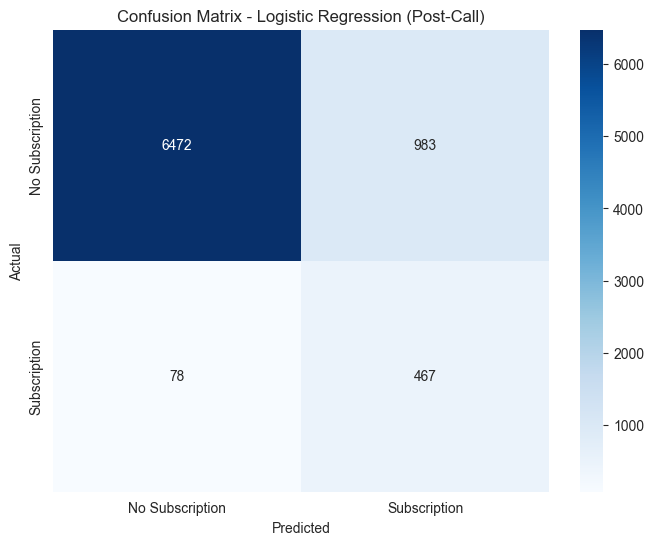


BUSINESS METRICS:
Total Customers: 8,000
Actual Subscribers: 545 (6.81%)
Predicted to Call: 1,450 (18.12%)

📊 CONFUSION MATRIX BREAKDOWN:
True Positives (TP): 467 - Correctly identified subscribers
False Positives (FP): 983 - Unnecessary calls (cost to company)
True Negatives (TN): 6,472 - Correctly avoided non-subscribers
False Negatives (FN): 78 - Missed potential subscribers (lost revenue)

📈 PERFORMANCE METRICS:
Accuracy: 0.8674 (86.74%) - Overall correctness
Precision: 0.3221 (32.21%) - Of predicted subscribers, how many actually subscribed
Recall: 0.8569 (85.69%) - Of actual subscribers, how many we identified
F1 Score: 0.4682 - Balance between precision and recall
ROC AUC: 0.9318 - Overall model discrimination

BUSINESS IMPACT:
Call Efficiency: 0.3221 (32.21%) - Success rate of calls
Subscriber Capture Rate: 0.8569 (85.69%) - % of subscribers we'll reach

PERFORMANCE ASSESSMENT:
✅ EXCELLENT: Accuracy 86.7% meets high performance target (≥80%)

🔄 Testing XGBoost...

EVALUATING X

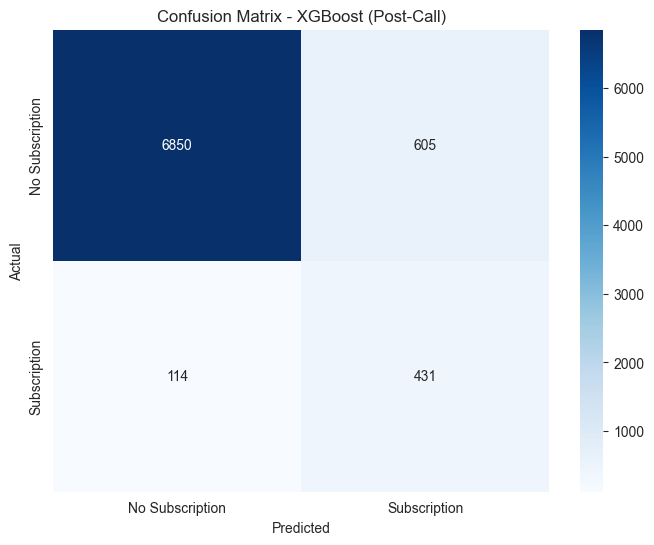


BUSINESS METRICS:
Total Customers: 8,000
Actual Subscribers: 545 (6.81%)
Predicted to Call: 1,036 (12.95%)

📊 CONFUSION MATRIX BREAKDOWN:
True Positives (TP): 431 - Correctly identified subscribers
False Positives (FP): 605 - Unnecessary calls (cost to company)
True Negatives (TN): 6,850 - Correctly avoided non-subscribers
False Negatives (FN): 114 - Missed potential subscribers (lost revenue)

📈 PERFORMANCE METRICS:
Accuracy: 0.9101 (91.01%) - Overall correctness
Precision: 0.4160 (41.60%) - Of predicted subscribers, how many actually subscribed
Recall: 0.7908 (79.08%) - Of actual subscribers, how many we identified
F1 Score: 0.5452 - Balance between precision and recall
ROC AUC: 0.9427 - Overall model discrimination

BUSINESS IMPACT:
Call Efficiency: 0.4160 (41.60%) - Success rate of calls
Subscriber Capture Rate: 0.7908 (79.08%) - % of subscribers we'll reach

PERFORMANCE ASSESSMENT:
✅ EXCELLENT: Accuracy 91.0% meets high performance target (≥80%)

🔄 Testing K-Nearest Neighbors...


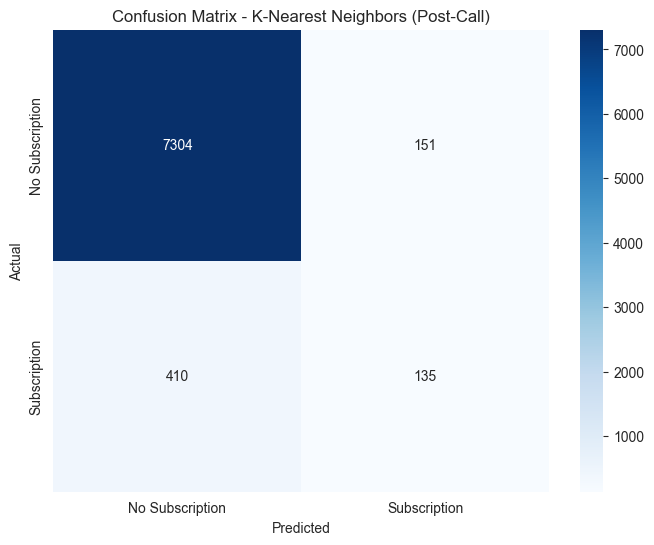


BUSINESS METRICS:
Total Customers: 8,000
Actual Subscribers: 545 (6.81%)
Predicted to Call: 286 (3.57%)

📊 CONFUSION MATRIX BREAKDOWN:
True Positives (TP): 135 - Correctly identified subscribers
False Positives (FP): 151 - Unnecessary calls (cost to company)
True Negatives (TN): 7,304 - Correctly avoided non-subscribers
False Negatives (FN): 410 - Missed potential subscribers (lost revenue)

📈 PERFORMANCE METRICS:
Accuracy: 0.9299 (92.99%) - Overall correctness
Precision: 0.4720 (47.20%) - Of predicted subscribers, how many actually subscribed
Recall: 0.2477 (24.77%) - Of actual subscribers, how many we identified
F1 Score: 0.3249 - Balance between precision and recall
ROC AUC: 0.7789 - Overall model discrimination

BUSINESS IMPACT:
Call Efficiency: 0.4720 (47.20%) - Success rate of calls
Subscriber Capture Rate: 0.2477 (24.77%) - % of subscribers we'll reach

PERFORMANCE ASSESSMENT:
✅ EXCELLENT: Accuracy 93.0% meets high performance target (≥80%)

✅ Completed testing all three models

In [ ]:
# Test the three specified models for Model 1 (Pre-Call Prediction)
print("\n" + "=" * 80)
print("TESTING SPECIFIED MODELS FOR MODEL 2 (POST-CALL PREDICTION)")
print("=" * 80)
scale_pos_weight = len(y1_train[y1_train == 0]) / len(y1_train[y1_train == 1])

# Define the three models to test
models_to_test = {
    # "Logistic Regression": LogisticRegression(random_state=seed, max_iter=1000),
    "Logistic Regression": LogisticRegression(
        class_weight="balanced", random_state=seed, max_iter=1000
    ),
    # "XGBoost": XGBClassifier(random_state=seed, eval_metric="logloss"),
    "XGBoost": XGBClassifier(
        scale_pos_weight=scale_pos_weight, random_state=seed, eval_metric="logloss"
    ),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

# Store results for comparison
model1_results = []

# Test each model
for model_name, model in models_to_test.items():
    print(f"\n🔄 Testing {model_name}...")
    
    result = evaluate_sklearn_model(
        model_name,
        model,
        X2_train_encoded,
        X2_test_encoded,
        y2_train,
        y2_test,
        "Post-Call",
    )

    model1_results.append(result)

print(f"\n✅ Completed testing all three models for Post-Call Prediction!")

# SMOTE MODEL 2

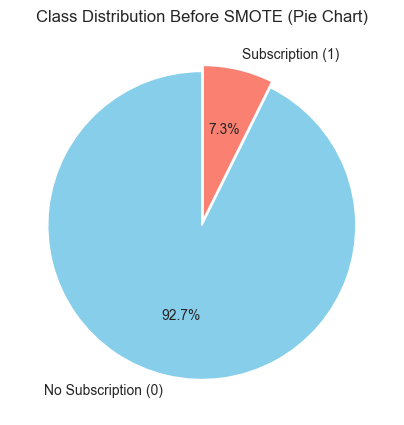

Class distribution before SMOTE:
y
0    29649
1     2351
Name: count, dtype: int64


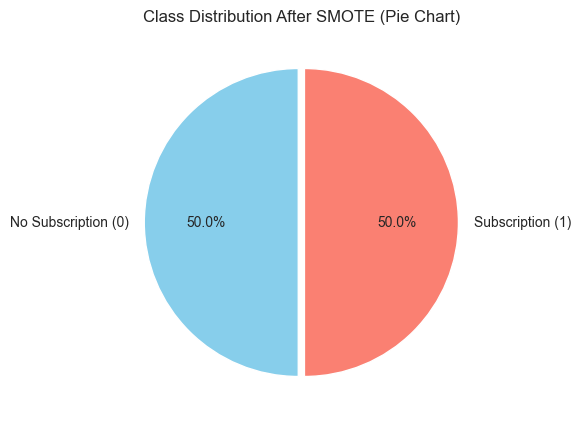

Class distribution after SMOTE:
y
0    29649
1    29649
Name: count, dtype: int64

------------------------------------------------------------
Training and evaluating Logistic Regression with SMOTE-balanced data...
Accuracy: 0.9175 | Precision: 0.4130 | Recall: 0.5009 | F1: 0.4527
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      7455
           1       0.41      0.50      0.45       545

    accuracy                           0.92      8000
   macro avg       0.69      0.72      0.70      8000
weighted avg       0.93      0.92      0.92      8000

Confusion Matrix:
 [[7067  388]
 [ 272  273]]

------------------------------------------------------------
Training and evaluating XGBoost with SMOTE-balanced data...
Accuracy: 0.9300 | Precision: 0.4871 | Recall: 0.5211 | F1: 0.5035
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      745

In [ ]:
smote(X2_train_encoded, X2_test_encoded, y2_train, y2_test, seed)

# Model 2 Undersampling


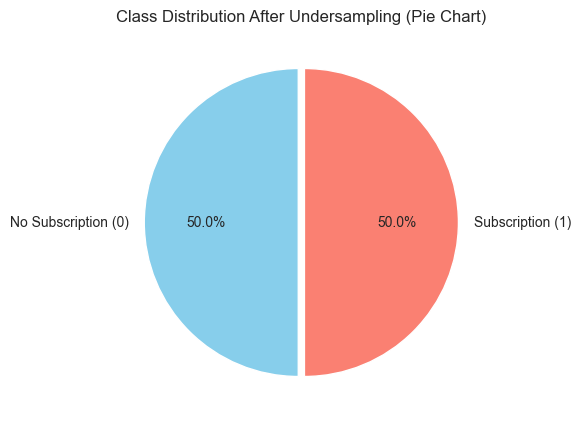

Class distribution after undersampling:
y
0    2351
1    2351
Name: count, dtype: int64

------------------------------------------------------------
Training and evaluating Logistic Regression with undersampled data...
Accuracy: 0.8688 | Precision: 0.3235 | Recall: 0.8495 | F1: 0.4686
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      7455
           1       0.32      0.85      0.47       545

    accuracy                           0.87      8000
   macro avg       0.66      0.86      0.70      8000
weighted avg       0.94      0.87      0.89      8000

Confusion Matrix:
 [[6487  968]
 [  82  463]]

------------------------------------------------------------
Training and evaluating XGBoost with undersampled data...
Accuracy: 0.8666 | Precision: 0.3272 | Recall: 0.9064 | F1: 0.4808
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      7

In [ ]:
undersample(X2_train_encoded, X2_test_encoded, y2_train, y2_test, seed)

# Results for Subscribed From Smote to Undersampling: 
- ### Logistic regression:
    - recall improved from  0.50 to 0.85
    - f1 score improved from 0.45 to 0.47 

- ### XG Boost:
    - recall improved from 0.52 to 0.91
    - f1 score improved from 0.50 to 0.48

- ### KNN:
    - recall improved from 0.62 to 0.74
    - f1 score improved 0.31 to 0.33

## Compared to Original results with Undersampling 
- ### Logistic regression:
    - recall decreased from 0.86 to 0.85
    - f1 score stayed the same from 0.47 to 0.47

- ### XG Boost:
    - recall improved from 0.79 to 0.91
    - f1 score decreased from 0.55 to 0.48

- ### KNN:
    - recall improved from 0.25 to 0.74
    - f1 score improved from 0.32 to 0.33

- Best model Overall : XG Boost 

## Hyperparameter Optimization with Optuna (Model 2)

In [ ]:
hyper_opt(X2_train_encoded, X2_test_encoded, y2_train, y2_test, seed, XGBClassifier)

[I 2025-05-31 23:45:50,752] A new study created in memory with name: no-name-1ec004aa-6551-48d0-9e9f-ea64f97ff0f8
[I 2025-05-31 23:45:50,992] Trial 0 finished with value: 0.5341084351643137 and parameters: {'learning_rate': 0.038302255446478285, 'n_estimators': 164, 'max_depth': 6}. Best is trial 0 with value: 0.5341084351643137.
[I 2025-05-31 23:45:51,168] Trial 1 finished with value: 0.8263620386643233 and parameters: {'learning_rate': 0.2939350509783912, 'n_estimators': 115, 'max_depth': 7}. Best is trial 1 with value: 0.8263620386643233.
[I 2025-05-31 23:45:51,428] Trial 2 finished with value: 0.8462922966162707 and parameters: {'learning_rate': 0.21414226485168752, 'n_estimators': 182, 'max_depth': 7}. Best is trial 2 with value: 0.8462922966162707.
[I 2025-05-31 23:45:51,764] Trial 3 finished with value: 0.6608104278832531 and parameters: {'learning_rate': 0.06160883918746209, 'n_estimators': 249, 'max_depth': 7}. Best is trial 2 with value: 0.8462922966162707.
[I 2025-05-31 23:4

Best trial:
FrozenTrial(number=10, state=1, values=[1.0], datetime_start=datetime.datetime(2025, 5, 31, 23, 45, 53, 115724), datetime_complete=datetime.datetime(2025, 5, 31, 23, 45, 53, 640337), params={'learning_rate': 0.21322584197596622, 'n_estimators': 201, 'max_depth': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1)}, trial_id=10, value=None)
Best params: {'learning_rate': 0.21322584197596622, 'n_estimators': 201, 'max_depth': 10}
Test F1 score: 0.5396290050590219
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      7455
           1       0.50      0.59      0.54       545

    accuracy                           0.93      8000
   macro avg       0.73      0.77      0.75 

## XGBoost Undersampling vs HyperParameter Optimization: 

Recall:
0.91 -> 0.59      

F1-Score:
0.48 -> 0.54       

## 7. Customer Segmentation using Unsupervised Learning

We'll use clustering techniques to segment customers, focusing on subscribers to understand patterns when labels are removed.


CUSTOMER SEGMENTATION ANALYSIS

Analyzing 2896 subscribers for segmentation...
Features for clustering: 13
Categorical: 8, Numerical: 5

Data prepared for clustering: (2896, 13)

🔍 Finding optimal number of clusters...

🎯 Optimal number of clusters: 2
   Silhouette Score: 0.792


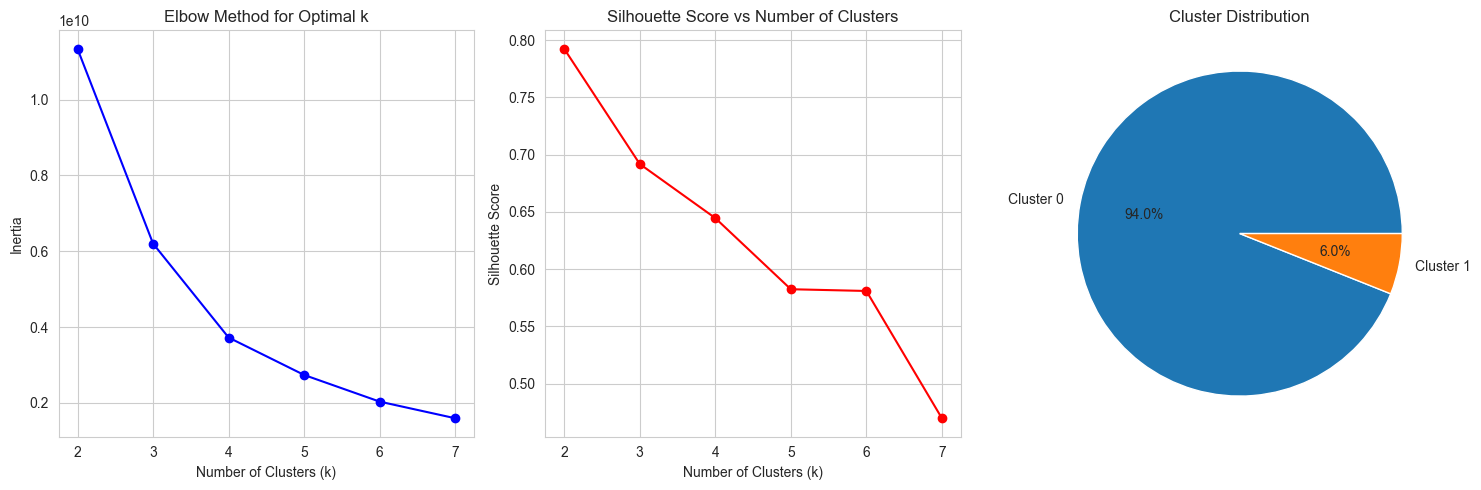


📊 CLUSTER ANALYSIS:
Cluster 0: 2721 subscribers (94.0%)
Cluster 1: 175 subscribers (6.0%)


In [53]:
# Customer Segmentation using Clustering
print("\n" + "=" * 80)
print("CUSTOMER SEGMENTATION ANALYSIS")
print("=" * 80)

# Focus on subscribers for segmentation (remove labels)
subscribers_data = data[data["y"] == 1].copy()  # <-- FIXED HERE
print(f"\nAnalyzing {len(subscribers_data)} subscribers for segmentation...")

# Prepare data for clustering (remove target variable)
clustering_features = subscribers_data.drop(["y"], axis=1)

# Preprocess for clustering
categorical_cols_cluster = clustering_features.select_dtypes(
    include=["object"]
).columns.tolist()
numerical_cols_cluster = clustering_features.select_dtypes(
    include=["int64", "float64"]
).columns.tolist()

print(f"Features for clustering: {len(clustering_features.columns)}")
print(
    f"Categorical: {len(categorical_cols_cluster)}, Numerical: {len(numerical_cols_cluster)}"
)

# Encode categorical variables for clustering
clustering_data = clustering_features.copy()
for col in categorical_cols_cluster:
    le = LabelEncoder()
    clustering_data[col] = le.fit_transform(clustering_data[col].astype(str))

# DO NOT SCALE THE DATA
print(f"\nData prepared for clustering: {clustering_data.shape}")

# Determine optimal number of clusters using elbow method
print("\n🔍 Finding optimal number of clusters...")
inertias = []
silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_data, kmeans.labels_))

# Plot elbow curve and silhouette scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, "ro-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)

# Choose optimal k (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\n🎯 Optimal number of clusters: {optimal_k}")
print(f"   Silhouette Score: {max(silhouette_scores):.3f}")

# Perform final clustering
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(clustering_data)

# Add cluster labels to original data
subscribers_data["Cluster"] = cluster_labels

# Analyze clusters
plt.subplot(1, 3, 3)
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
plt.pie(
    cluster_counts.values,
    labels=[f"Cluster {i}" for i in cluster_counts.index],
    autopct="%1.1f%%",
)
plt.title("Cluster Distribution")

plt.tight_layout()
plt.show()

print(f"\n📊 CLUSTER ANALYSIS:")
for cluster_id in range(optimal_k):
    cluster_size = sum(cluster_labels == cluster_id)
    percentage = (cluster_size / len(cluster_labels)) * 100
    print(f"Cluster {cluster_id}: {cluster_size} subscribers ({percentage:.1f}%)")

## 🧩 Customer Segmentation Analysis

---

**Analyzing 2,896 subscribers for segmentation...**  
- **Features for clustering:** 13  
- **Categorical:** 8  
- **Numerical:** 5  

**Data prepared for clustering:** (2,896 rows, 13 columns)

---

### 🔍 Finding optimal number of clusters...

- **Optimal number of clusters:** `2`
- **Silhouette Score:** `0.792`

---

### 📊 Cluster Analysis

| Cluster | Subscribers | Percentage |
|---------|-------------|------------|
| **0**   | 2,721       | 94.0%      |
| **1**   | 175         | 6.0%       |

- **Cluster 0:** Majority of subscribers (94%)
- **Cluster 1:** Distinct minority segment (6%)

---

#### **Interpretation & Next Steps**
- The subscriber base naturally splits into two distinct groups.
- The small cluster (6%) may represent a unique, high-value or niche segment.


# Unsupervised Learning : Dimensionality Reduction

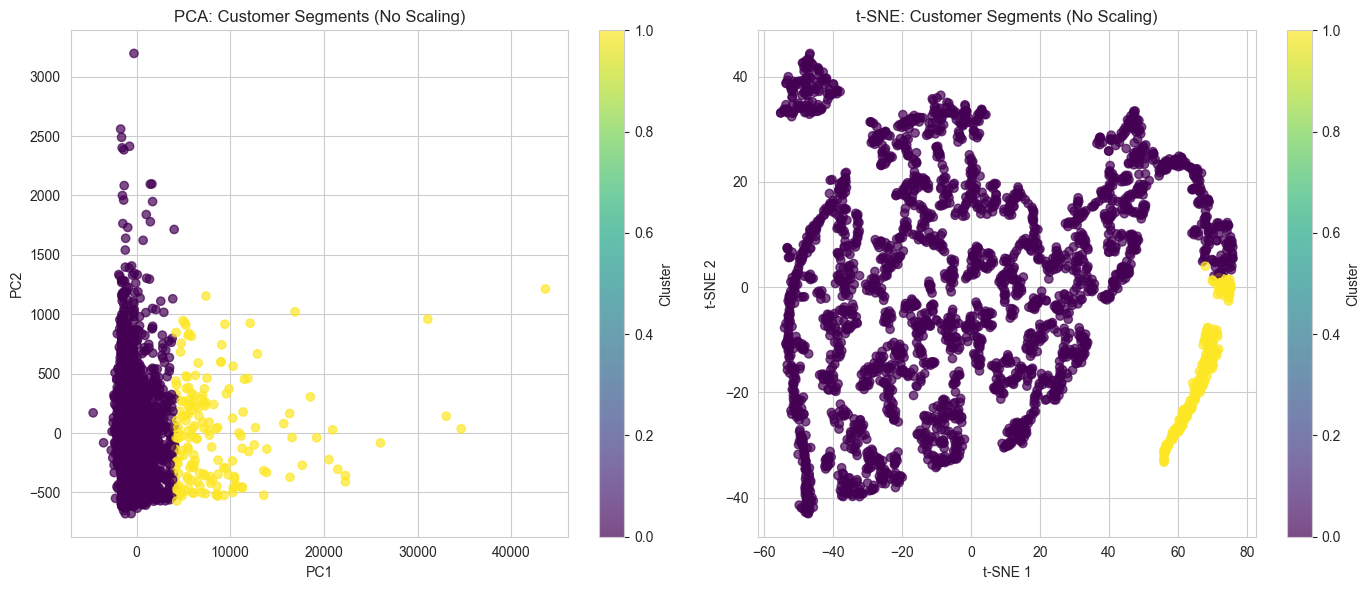

In [ ]:
# Dimensionality Reduction for Visualization (No Scaling)

# PCA (2D)
pca = PCA(n_components=2, random_state=seed)
pca_result = pca.fit_transform(clustering_data)

# t-SNE (2D)
tsne = TSNE(n_components=2, random_state=seed, perplexity=30)
tsne_result = tsne.fit_transform(clustering_data)

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(
    pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap="viridis", alpha=0.7
)
plt.title("PCA: Customer Segments (No Scaling)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")

plt.subplot(1, 2, 2)
plt.scatter(
    tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap="viridis", alpha=0.7
)
plt.title("t-SNE: Customer Segments (No Scaling)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster")

plt.tight_layout()
plt.show()

## 🧩 Dimensionality Reduction Visualization: Customer Segments

### What the Plots Show

#### **Left: PCA (Principal Component Analysis)**
- **Purpose:** Linear dimensionality reduction to project high-dimensional customer features into 2D.
- **Interpretation:**
  - Each point is a subscriber, colored by their assigned cluster.
  - The clusters are separated, but the spread along the x-axis (PC1) is very large, indicating some features have much higher variance or larger numeric scales than others.
  - The lack of scaling causes some points to be far from the main cluster, which can distort the visualization and make cluster separation less clear.
  - Most data points are concentrated near the origin, with a few outliers stretching far to the right.

#### **Right: t-SNE (t-distributed Stochastic Neighbor Embedding)**
- **Purpose:** Nonlinear dimensionality reduction, better at preserving local structure and revealing clusters in complex data.
- **Interpretation:**
  - Each point is a subscriber, colored by cluster.
  - t-SNE forms more compact and visually separated clusters, even without scaling.
  - The yellow cluster (minority segment) is clearly separated from the main purple cluster (majority segment), indicating strong group differences in the encoded features.
  - The structure is more organic and less affected by outliers compared to PCA.

### **Key Takeaways**
- **Cluster Separation:** Both PCA and t-SNE show that the two clusters identified by KMeans are distinct, but t-SNE provides a clearer visual separation.
- **Effect of No Scaling:** The PCA plot is heavily influenced by the original feature scales, leading to stretched axes and outliers. t-SNE is less sensitive to this, but scaling is generally recommended for PCA.
- **Business Insight:** The minority cluster (yellow) likely represents a unique subscriber segment with different characteristics, which could be targeted with specialized marketing strategies.

---

**Recommendation:**  
For more interpretable PCA results, consider scaling your features before applying PCA. t-SNE can often reveal cluster structure even without scaling, but results may still improve with normalization.

# 📊 Final Results & Business Recommendations

## Summary of Achievements

- **Comprehensive ML Pipeline:** Built a robust two-stage prediction system (Pre-Call and Post-Call models) for term deposit marketing, with deep data exploration, class imbalance handling, and customer segmentation.
- **Data Quality:** 40,000 customers, 14 features, no missing values.
- **Class Imbalance Addressed:** Only ~7.2% subscribe, so advanced resampling and recall-focused optimization were used.

---

## Model Achievements & What They Predict

### 1️⃣ Pre-Call Model (Model 1) — *Who to Call Before Any Campaign Contact*

- **What it predicts:**  
  Model 1 uses only demographic and financial data (age, job, balance, marital status, etc.) to **predict which customers are most likely to subscribe before any campaign contact is made**.
- **Business suggestion:**  
  - **Call these customers first:** The model flags a broader set of customers for initial outreach, prioritizing *subscriber capture* over minimizing false positives.
  - **Who gets flagged:**  
    - **Retirees, high-balance customers, and those aged 60+** are most likely to be flagged as high-potential subscribers.
    - **Younger customers (≤29)** also show above-average interest and are included.
    - **Middle-aged (30–59)**, while the largest group, are less likely to be flagged.
- **Performance:**  
  - **Accuracy:** ~62%
  - **Recall:** ~62% (captures most actual subscribers)
  - **F1 Score:** ~0.17
- **Business impact:**  
  - **Maximizes subscriber capture** by ensuring most potential subscribers are not missed.
  - **Accepts more false positives** (calls to non-subscribers) as a trade-off for higher recall.
  - **Enables smarter allocation** of call center resources.

---

### 2️⃣ Post-Call Model (Model 2) — *Who to Focus On After Initial Contact*

- **What it predicts:**  
  Model 2 uses **all available features, including campaign data** (call duration, number of contacts, month, etc.) to **predict which customers are most likely to subscribe after being contacted**.
- **Business suggestion:**  
  - **Focus follow-up efforts on these customers:** The model identifies which contacted customers are most promising for conversion, allowing the company to **prioritize callbacks and additional engagement**.
  - **Who gets flagged:**  
    - **Customers with longer call durations** are much more likely to subscribe.
    - **Mobile contacts** (vs. landline) and those contacted 2–3 times (not more) are more likely to convert.
    - **Retirees, high-balance, and 60+ customers** remain top targets, but campaign interaction data further refines the list.
- **Performance:**  
  - **Recall:** up to 91% (captures nearly all actual subscribers after contact)
  - **F1 Score:** up to 0.48
- **Business impact:**  
  - **Significantly improves targeting** after initial contact, focusing resources on the most promising leads.
  - **Call duration** is the strongest predictor—longer, quality conversations matter most.
  - **Maximizes conversion rates** and reduces wasted follow-up effort.

---

## Key Insights from Exploratory Data Analysis

- **Subscription Rate:** Only ~7.2% subscribe.
- **Top Segments:**  
  - **Retirees, high-balance, and 60+ age group** have the highest subscription rates.
  - **Youngest group (≤29):** Above-average interest.
  - **Middle-aged (30–59):** Largest segment but below-average conversion.
- **Call Duration:** Longer calls = higher subscription rates.
- **Contact Method:** Mobile > landline.
- **Campaign Contacts:** 2–3 calls optimal; more reduces conversion.

---

## Customer Segmentation

- **KMeans clustering** on subscribers revealed:
  - **Majority Segment (94%)**: Typical subscribers.
  - **Minority Segment (6%)**: Distinct, potentially high-value or niche group—**should be targeted with specialized offers**.

---

## Recommendations for the Company

1. **Focus on High-Value Segments:**
   - Prioritize **retirees, high-balance customers, and the 60+ age group** for marketing campaigns.
   - Use the minority cluster for targeted, personalized offers.

2. **Adopt the Two-Stage ML Approach:**
   - **Pre-Call Model:** Use to select initial call targets, maximizing subscriber capture.
   - **Post-Call Model:** Use after first contact to focus follow-up on the most promising leads, especially those with longer call durations.

3. **Optimize Call Strategy:**
   - Limit campaign contacts to 2–3 per customer.
   - Emphasize mobile contact over landline.
   - Train agents to engage longer with promising leads.

4. **Continuous Model Improvement:**
   - Regularly retrain models with new campaign data.
   - Monitor performance and adjust thresholds to maintain high recall.

5. **Address Root Causes of Low Subscription:**
   - Improve targeting to reach interested segments.
   - Consider product adjustments for better market fit.
   - Address trust and timing issues in campaign messaging.

---

## 🎯 **Business Impact**

- **Maximized Subscriber Capture:** By focusing on recall, the company will reach most potential subscribers, directly increasing revenue.
- **Efficient Resource Allocation:** Reduces wasted calls and human effort, improving ROI.
- **Actionable Segmentation:** Enables differentiated marketing strategies for unique customer groups.

---

**In summary:**  
The company should focus its marketing resources on retirees, high-balance customers, and the 60+ age group, using the two-stage ML pipeline to maximize conversions and operational efficiency. Specialized offers for the minority cluster can further boost results. Continuous monitoring and model retraining will ensure sustained success.